# Test code for computing LRTs and confidence intervals

## Setup

In [1]:
import os
while not os.path.exists('test_data'):
    os.chdir('..')
os.getcwd()

'/Users/yl3/github/genomics/nmflib'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats

import nmflib.nmf

In [3]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [4]:
sns.set()

## Load data

In [68]:
def load_syn_data(r=70):  # r in PCAWG-7 data seems to be around 70
    datadir = 'test_data'
    W = pd.read_csv(datadir + '/ground.truth.syn.sigs.csv.gz',
                    index_col=[0, 1],
                    header=0)
    H = pd.read_csv(datadir +
                    '/ground.truth.syn.exposures.csv.gz',
                    index_col=0,
                    header=0)
    
    # Compute S, O and X_exp.
    WH = W.dot(H)
    O = scipy.stats.uniform.rvs(0, 20, WH.shape)
    S = scipy.stats.uniform.rvs(0.05, 1 - 0.05, WH.shape)
    
    # Simulate random counts.
    p = nmflib.nmf._nb_p((WH + O) * S, r)
    X_obs = scipy.stats.nbinom.rvs(r, p)
    return X_obs, W, H, S, O, r

In [6]:
np.random.seed(0)
X_obs, W_true, H_true, S_true, O_true, r_true = load_syn_data()
X_obs = pd.DataFrame(X_obs, index=W_true.index, columns=H_true.columns)

## First: fit the data.

In [7]:
W, H, r, n_iter, errors = nmflib.nmf.fit(X_obs, W_true.shape[1], S_true,
                                         O_true, True, max_iter=2000,
                                         verbose=True)

INFO:root:Updated r to 2.617887688212463
INFO:root:Updated r to 2.8670768131951627
INFO:root:Updated r to 3.0551984279323436
INFO:root:Updated r to 3.7803134944562755
INFO:root:Iteration 10 after 3.631 seconds, error: -147543153.77314487
INFO:root:Updated r to 6.713234908722501
INFO:root:Updated r to 12.499144194997115
INFO:root:Iteration 20 after 4.827 seconds, error: -147641137.37883416
INFO:root:Updated r to 24.64133950136789
INFO:root:Iteration 30 after 5.515 seconds, error: -147689404.84505832
INFO:root:Iteration 40 after 5.743 seconds, error: -147710781.87765732
INFO:root:Updated r to 41.717863627486054
INFO:root:Iteration 50 after 6.601 seconds, error: -147728078.12487012
INFO:root:Iteration 60 after 6.809 seconds, error: -147736492.99068806
INFO:root:Iteration 70 after 7.055 seconds, error: -147741663.64767116
INFO:root:Updated r to 59.57107337947317
INFO:root:Iteration 80 after 7.649 seconds, error: -147747938.97671044
INFO:root:Iteration 90 after 7.846 seconds, error: -147750

INFO:root:Iteration 1060 after 30.407 seconds, error: -147773490.29653576
INFO:root:Iteration 1070 after 30.644 seconds, error: -147773522.01167068
INFO:root:Iteration 1080 after 30.861 seconds, error: -147773552.4645343
INFO:root:Iteration 1090 after 31.069 seconds, error: -147773581.43482852
INFO:root:Iteration 1100 after 31.313 seconds, error: -147773609.1320214
INFO:root:Iteration 1110 after 31.514 seconds, error: -147773635.89222902
INFO:root:Iteration 1120 after 31.737 seconds, error: -147773661.97954065
INFO:root:Iteration 1130 after 31.988 seconds, error: -147773687.641322
INFO:root:Iteration 1130 after 31.989 seconds, W and H converged, error: -147773687.641322
INFO:root:Updated r to 115.77681947903694
INFO:root:Updated r to 115.82535188129643
INFO:root:Updated r to 115.85209089533295
INFO:root:Updated r to 115.87244203559226
INFO:root:Updated r to 115.88956545507
INFO:root:Updated r to 115.90472627332066
INFO:root:Updated r to 115.91857842352624
INFO:root:Updated r to 115.931

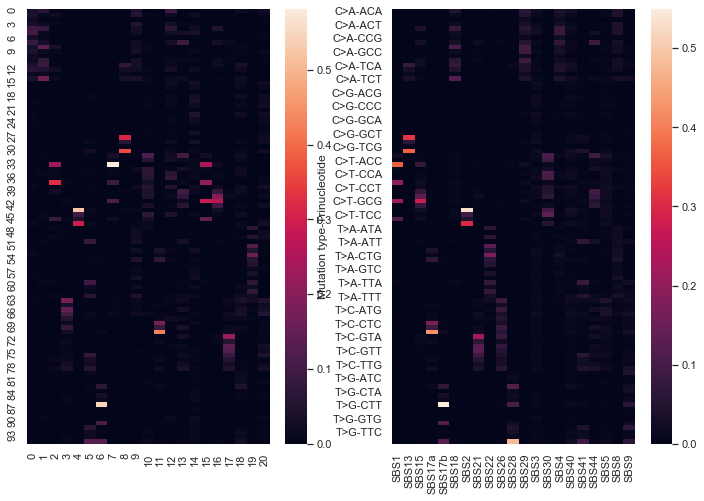

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
sns.heatmap(W, ax=ax[0])
sns.heatmap(W_true, ax=ax[1])

## Test LRT.

### Which signature has the lowest total exposure? Find the patient with the lowest of number of that signature.

In [188]:
H = pd.DataFrame(H.values, columns=H_true.columns)
H

,SP.Syn.Bladder-TCC::S.1,SP.Syn.Bladder-TCC::S.2,SP.Syn.Bladder-TCC::S.3,SP.Syn.Bladder-TCC::S.4,SP.Syn.Bladder-TCC::S.5,SP.Syn.Bladder-TCC::S.6,SP.Syn.Bladder-TCC::S.7,SP.Syn.Bladder-TCC::S.8,SP.Syn.Bladder-TCC::S.9,SP.Syn.Bladder-TCC::S.10,...,SP.Syn.Stomach-AdenoCA::S.291,SP.Syn.Stomach-AdenoCA::S.292,SP.Syn.Stomach-AdenoCA::S.293,SP.Syn.Stomach-AdenoCA::S.294,SP.Syn.Stomach-AdenoCA::S.295,SP.Syn.Stomach-AdenoCA::S.296,SP.Syn.Stomach-AdenoCA::S.297,SP.Syn.Stomach-AdenoCA::S.298,SP.Syn.Stomach-AdenoCA::S.299,SP.Syn.Stomach-AdenoCA::S.300
0,246.372257,0.030873,3.682474e-19,1.205980e+02,226.590672,4.384992e+02,90.040100,1.916240e+03,134.100823,1.874307e+02,...,9.219452e-30,8.210593e-20,1.827784e+02,15.988048,1.195882e+02,560.029661,701.929598,3.005699e+02,238.201370,2.855691e+04
1,327.334572,72.814910,1.013121e+02,5.322921e+02,324.047260,5.758520e+02,565.513872,3.822392e+02,284.868938,9.887980e-20,...,1.460300e+03,1.849070e+02,2.913431e+02,385.774371,4.536145e+02,1897.535332,6273.765412,1.967372e+03,373.343458,4.854385e-11
2,1.188273,74.221025,9.263341e+01,1.201955e+02,183.883244,5.047975e+02,354.749062,3.291384e+01,28.567223,2.594688e+02,...,5.689100e+02,1.740922e+02,1.525683e+02,0.000467,2.740048e+02,310.452890,906.226137,2.600435e+02,87.247997,3.666138e-26
3,1386.431196,712.241497,5.088091e+02,1.955156e+03,1906.003723,1.242298e+03,3597.403067,2.582831e+02,1111.600299,1.948015e+02,...,9.699042e+02,2.167551e+01,9.008987e+01,137.624385,8.606629e+01,491.398179,1663.969873,3.850300e-52,180.072205,7.941335e+03
4,486.029846,832.125566,1.087868e+03,8.840000e+02,1354.236059,1.497995e+04,3232.602070,2.366628e+04,2002.393466,1.775597e+04,...,3.970931e+02,1.944875e+02,2.755406e+03,44.469194,2.178917e+02,259.392888,317.655289,2.321272e-76,532.768290,4.867329e+03
5,318.061064,95.949270,9.593623e+01,2.104428e+02,653.286152,5.791761e+02,56.180692,1.539595e-04,202.743090,2.865698e+00,...,1.648274e+04,3.521897e-21,6.000060e+01,45.602454,1.424854e-13,255.453314,371.679067,1.609106e-73,368.463144,7.358969e+03
6,161.601183,21.020104,4.156682e+01,1.219254e+02,340.149663,2.545903e+02,298.311658,3.835268e+01,139.302050,1.674690e+01,...,8.968470e+02,2.724495e-65,1.467573e+03,2497.727831,2.247356e+02,280.365772,8391.546116,4.921523e+01,5698.872986,5.319051e+03
7,152.195660,315.007174,1.375389e+02,7.601894e+01,343.528285,1.938164e+02,199.564831,2.048032e+02,151.026431,3.215387e+02,...,1.717209e-01,7.237414e+02,8.346908e+02,413.814571,1.424036e+03,383.939607,0.001313,1.039961e+03,218.761966,2.925653e-13
8,5072.494679,1864.648539,1.931204e+03,4.390274e+03,3938.987829,1.031825e+03,1244.968524,7.804084e+03,3591.893284,4.449585e+03,...,8.009692e+02,2.118989e-02,2.406592e+03,155.776209,3.657906e-36,96.851844,260.826895,9.090170e+01,316.109038,1.806662e+04
9,495.869622,74.847314,1.368099e+02,2.692231e+02,1252.177700,6.733144e+02,723.314801,1.127889e+04,220.923581,3.283333e-04,...,8.397355e+02,9.564514e-13,9.514003e+01,105.338448,4.731681e-19,192.213293,147.153322,3.604768e-12,799.852052,2.168649e+04


In [189]:
rarest_sig = H.sum(1).sort_values().index[0]
rarest_sig

2

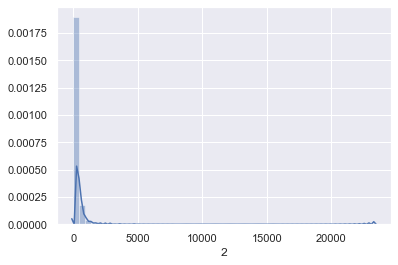

In [190]:
sns.distplot(H.loc[rarest_sig, ])

In [191]:
samples_of_interest = H.loc[rarest_sig, ].sort_values()[[0, -1]]
samples_of_interest

SP.Syn.Stomach-AdenoCA::S.144    2.738025e-70
SP.Syn.Stomach-AdenoCA::S.178    2.336531e+04
Name: 2, dtype: float64

#### Compute LRT on the sample with no SBS15 mutations.

In [192]:
x_obs = X_obs[samples_of_interest.index[0]].values
sig_idx = np.where(H.index == rarest_sig)[0][0]
h_hat = H[samples_of_interest.index[0]].values

In [193]:
sel = np.where(samples_of_interest.index[0] == H.columns)[0][0]
sel

2543

In [202]:
pval, stat, ml_loglik, h0_loglik, restricted_h = nmflib.nmf.hk_lrt(
    x_obs, W, sig_idx, S_true[:, [sel]], O_true[:, [sel]], r, h_hat)
(pval, stat, ml_loglik, h0_loglik)

(1.0, 0.0, -429.209071926011, -429.2073110728852)

### Which signature has the highest total exposure? Find the patient with the highest of number of that signature.

In [136]:
commonest_sig = H.max(1).sort_values().index[-1]
commonest_sig

10

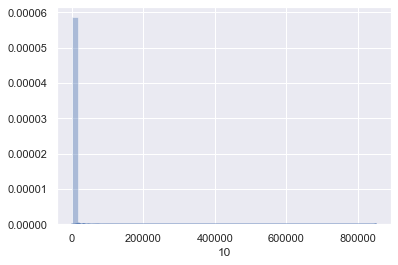

In [137]:
sns.distplot(H.loc[commonest_sig, ])

In [138]:
samples_of_interest = H.loc[commonest_sig, ].sort_values()[[0, -1]]
samples_of_interest

SP.Syn.Kidney-RCC::S.222         2.080697e-102
SP.Syn.Stomach-AdenoCA::S.178     8.507878e+05
Name: 10, dtype: float64

In [139]:
sample = samples_of_interest.index[1]
sample

'SP.Syn.Stomach-AdenoCA::S.178'

In [142]:
x_obs = X_obs[sample].values
sig_idx = np.where(H.index == commonest_sig)[0][0]
h_hat = H[sample].values

In [143]:
sel = np.where(sample == H.columns)[0][0]
sel

2577

In [144]:
sig_idx

10

In [121]:
pval, stat, ml_loglik, h0_loglik, restricted_h = nmflib.nmf.hk_confint(
    x_obs, W, sig_idx, S_true[:, [sel]], O_true[:, [sel]], r, h_hat)
(pval, stat, ml_loglik, h0_loglik)

(0.0, 799.8753219340119, -830.2640814295596, -1230.2017423965656)

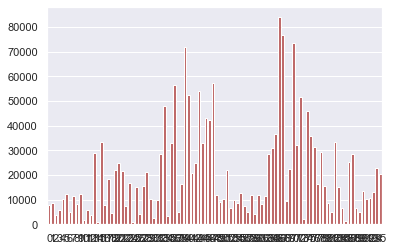

In [128]:
sns.barplot(np.arange(len(x_obs)), x_obs, color='indianred')

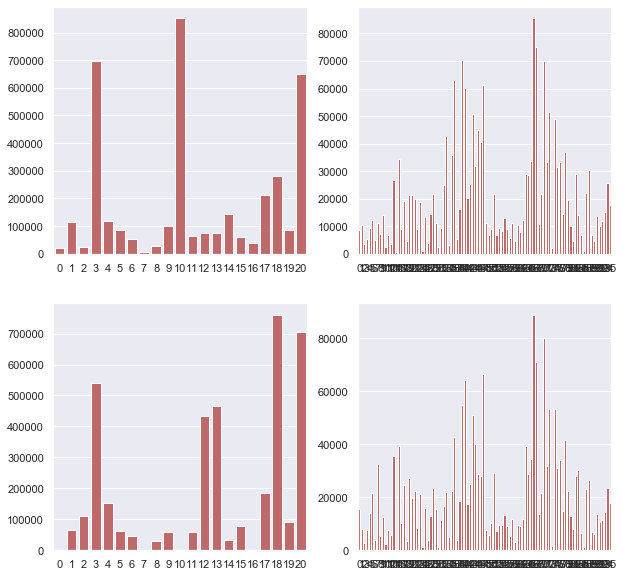

In [134]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.barplot(np.arange(len(h_hat)), h_hat, color='indianred', ax=ax[0, 0])
sns.barplot(np.arange(len(x_obs)),
            nmflib.nmf._nmf_mu(W,
                               h_hat.reshape(-1, 1),
                               S_true[:, [sel]],
                               O_true[:, [sel]]).reshape(-1),
            color='indianred',
            ax=ax[0, 1])
sns.barplot(np.arange(len(restricted_h)), restricted_h, color='indianred',
            ax=ax[1, 0])
sns.barplot(np.arange(len(x_obs)),
            nmflib.nmf._nmf_mu(W,
                               restricted_h.reshape(-1, 1),
                               S_true[:, [sel]],
                               O_true[:, [sel]]).reshape(-1),
            color='indianred',
            ax=ax[1, 1])

## Test confidence interval computation.

### Rarest signature

In [203]:
rarest_sig = H.sum(1).sort_values().index[0]
rarest_sig

2

In [204]:
samples_of_interest = H.loc[rarest_sig, ].sort_values()[[0, -1]]
samples_of_interest

SP.Syn.Stomach-AdenoCA::S.144    2.738025e-70
SP.Syn.Stomach-AdenoCA::S.178    2.336531e+04
Name: 2, dtype: float64

In [205]:
x_obs = X_obs[samples_of_interest.index[0]].values
sig_idx = np.where(H.index == rarest_sig)[0][0]
h_hat = H[samples_of_interest.index[0]].values

In [206]:
sel = np.where(samples_of_interest.index[0] == H.columns)[0][0]
sel

2543

In [210]:
alpha = 0.05
nmflib.nmf.hk_confint(
    x_obs, W, sig_idx, S_true[:, [sel]], O_true[:, [sel]], alpha, r, h_hat)

(0,
 701.7244349958783,
 1.0,
 0.0,
 -429.209071926011,
 -429.2073110728852,
       converged: True
            flag: 'converged'
  function_calls: 7
      iterations: 6
            root: 701.7244349958783,
 None)

In [211]:
alpha = 0.01
nmflib.nmf.hk_confint(
    x_obs, W, sig_idx, S_true[:, [sel]], O_true[:, [sel]], alpha, r, h_hat)

(0,
 751.8089292908975,
 1.0,
 0.0,
 -429.209071926011,
 -429.2073110728852,
       converged: True
            flag: 'converged'
  function_calls: 7
      iterations: 6
            root: 751.8089292908975,
 None)

In [212]:
alpha = 0.1
nmflib.nmf.hk_confint(
    x_obs, W, sig_idx, S_true[:, [sel]], O_true[:, [sel]], alpha, r, h_hat)

(0,
 675.8966887505458,
 1.0,
 0.0,
 -429.209071926011,
 -429.2073110728852,
       converged: True
            flag: 'converged'
  function_calls: 7
      iterations: 6
            root: 675.8966887505458,
 None)

In [214]:
%%time

nmflib.nmf.hk_confint(x_obs, W, sig_idx, S_true[:, [sel]], O_true[:, [sel]],
                      0.05, r, h_hat)

CPU times: user 44.5 ms, sys: 2.88 ms, total: 47.4 ms
Wall time: 47.5 ms


(0,
 701.7244349958783,
 1.0,
 0.0,
 -429.209071926011,
 -429.2073110728852,
       converged: True
            flag: 'converged'
  function_calls: 7
      iterations: 6
            root: 701.7244349958783,
 None)

### Commonest signature

In [168]:
commonest_sig = H.max(1).sort_values().index[-1]
commonest_sig

10

In [169]:
sample = samples_of_interest.index[1]
sample

'SP.Syn.Stomach-AdenoCA::S.178'

In [170]:
x_obs = X_obs[sample].values
sig_idx = np.where(H.index == commonest_sig)[0][0]
h_hat = H[sample].values

In [171]:
sel = np.where(sample == H.columns)[0][0]
sel

2577

In [172]:
sig_idx

10

In [178]:
nmflib.nmf.hk_confint(x_obs, W, sig_idx, S_true[:, [sel]], O_true[:, [sel]],
                      r=r, h_hat=h_hat)

(500788.12573674635,
 1278819.772206703,
 0.0,
 799.8753219340119,
 -830.2640814295596,
 -1230.2017423965656,
       converged: True
            flag: 'converged'
  function_calls: 9
      iterations: 8
            root: 1278819.772206703,
       converged: True
            flag: 'converged'
  function_calls: 10
      iterations: 9
            root: 500788.12573674635)

In [177]:
%time nmflib.nmf.hk_confint(x_obs, W, sig_idx, S_true[:, [sel]], O_true[:, [sel]], r=r, h_hat=h_hat)

CPU times: user 142 ms, sys: 3.63 ms, total: 146 ms
Wall time: 144 ms


(500788.12573674635,
 1278819.772206703,
 0.0,
 799.8753219340119,
 -830.2640814295596,
 -1230.2017423965656,
       converged: True
            flag: 'converged'
  function_calls: 9
      iterations: 8
            root: 1278819.772206703,
       converged: True
            flag: 'converged'
  function_calls: 10
      iterations: 9
            root: 500788.12573674635)